<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/team%2017/Assignment_EDA_Aiman_Hafizi_%26_Luqman_Ariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Customer Review Analysis in Malaysia <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The majority of restaurants request client reviews so they may better understand how to satisfy their patrons. Therefore, reviews are essential to the restaurant's successful development.


> Import all the libraries that will be use for dataset analysia processes.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


> Import the dataset from Google Drive for which will be use for this assignment.

In [3]:
# Google
file_google = "/content/drive/MyDrive/Colab Notebooks/GoogleReview_data_cleaned.csv"
df_G =pd.read_csv(file_google)
# TripAdvisor
file_TA = "/content/drive/MyDrive/Colab Notebooks/TripAdvisor_data_cleaned.csv"
df_TA =pd.read_csv(file_TA)
# Read raw data
master_dir = os.getcwd()

display(df_G.head(),df_TA.head())

,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


,Author,Title,Review,Rating,Dates,Restaurant,Location
0,kmc1e2018,Chambers Bar and Grill,"David, Thanga, Mikail and Chef Steven gave bri...",5.0,Reviewed yesterday,Chambers Grill,KL
1,"MizOthmanKuala Lumpur, Malaysia",Always a pleasure. Place to celebrate.,We visited for family celebration and as usual...,5.0,Reviewed 5 days ago,Chambers Grill,KL
2,"Relax36268533224Hjarno, Denmark",Enjoying good service and good food after a lo...,Perfect dinner after a long journey.After trav...,5.0,Reviewed 1 week ago,Chambers Grill,KL
3,tstrry,Great Steak for Couples,Had a great Tomahawk for me and hubby thanks t...,5.0,Reviewed 1 week ago,Chambers Grill,KL
4,Naim_123456789,Dining,"Excellent ambient. Excellent service by David,...",5.0,Reviewed 1 week ago,Chambers Grill,KL


## Data Preparation and Cleaning

**Step 1** - Concatenate the two dataset into one big dataset for easier analysis process.



In [ ]:
# combine reviews
df = pd.concat([df_TA, df_G], axis=0)
df_ori = df.copy()
print(df_ori)

                                 Author  \
0                             kmc1e2018   
1       MizOthmanKuala Lumpur, Malaysia   
2       Relax36268533224Hjarno, Denmark   
3                                tstrry   
4                        Naim_123456789   
...                                 ...   
222015                       Arun Sagar   
222016                   Asif Amir Khan   
222017                           saads7   
222018                            S. R.   
222019                     Nurul Jannah   

                                                    Title  \
0                                  Chambers Bar and Grill   
1                  Always a pleasure. Place to celebrate.   
2       Enjoying good service and good food after a lo...   
3                                 Great Steak for Couples   
4                                                  Dining   
...                                                   ...   
222015                                                Na

In [ ]:
# number of records
sampleNum = df.index.size
print(f"Sample Number: {sampleNum}")

Sample Number: 361784


In [ ]:
# number of restaurants
uniqueRestaurants = df['Restaurant'].unique().size
print(f"Unique Restaurants: {uniqueRestaurants}")

Unique Restaurants: 3515


**Step 2** - Display the dataset first to have an overview of what kind of data we have.

In [ ]:
display(df_ori)

,Author,Title,Review,Rating,Dates,Restaurant,Location
0,kmc1e2018,Chambers Bar and Grill,"David, Thanga, Mikail and Chef Steven gave bri...",5.0,Reviewed yesterday,Chambers Grill,KL
1,"MizOthmanKuala Lumpur, Malaysia",Always a pleasure. Place to celebrate.,We visited for family celebration and as usual...,5.0,Reviewed 5 days ago,Chambers Grill,KL
2,"Relax36268533224Hjarno, Denmark",Enjoying good service and good food after a lo...,Perfect dinner after a long journey.After trav...,5.0,Reviewed 1 week ago,Chambers Grill,KL
3,tstrry,Great Steak for Couples,Had a great Tomahawk for me and hubby thanks t...,5.0,Reviewed 1 week ago,Chambers Grill,KL
4,Naim_123456789,Dining,"Excellent ambient. Excellent service by David,...",5.0,Reviewed 1 week ago,Chambers Grill,KL
...,...,...,...,...,...,...,...
222015,Arun Sagar,NaN,"Good lamb kebabs, nice traditional mughlai food",5.0,NaN,BBQ NIGHTS,Petaling Jaya
222016,Asif Amir Khan,NaN,Pakistani food lovers must visit this place in...,5.0,NaN,BBQ NIGHTS,Petaling Jaya
222017,saads7,NaN,"Great food, open air dining, freshly cooked.",5.0,NaN,BBQ NIGHTS,Petaling Jaya
222018,S. R.,NaN,Good desi food. Ask for salam waiter,5.0,NaN,BBQ NIGHTS,Petaling Jaya


**Step 3** - Clean the dataset by adding a new column name "Label" which contain value "Positive", "Negative", or "Neutral" to reflect the rating of each review using the "Review" and "Rating" column

In [ ]:
# Subset wanted columns
df = df[['Review', 'Rating']]
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
display(df)

,Review,Rating
0,"David, Thanga, Mikail and Chef Steven gave bri...",5.0
1,We visited for family celebration and as usual...,5.0
2,Perfect dinner after a long journey.After trav...,5.0
3,Had a great Tomahawk for me and hubby thanks t...,5.0
4,"Excellent ambient. Excellent service by David,...",5.0
...,...,...
339690,Delicious food. I passed by this place while s...,5.0
339691,"To put it mildly, Horrible food, Horrible cust...",1.0
339692,Good vegetarian selection and the food was gre...,4.0
339693,Simple atmosphere with fresh air (on a rainy n...,5.0


In [ ]:
# Adding labels
def labelFunc(x):
    if int(x) > 3:
        return "Positive"
    elif int(x) < 3:
        return "Negative"
    elif int(x) == 3:
        return "Neutral"

# Add sentiment label
df_ori["Label"] = df_ori["Rating"].apply(labelFunc)
display(df_ori)

,Author,Title,Review,Rating,Dates,Restaurant,Location,Label
0,kmc1e2018,Chambers Bar and Grill,"David, Thanga, Mikail and Chef Steven gave bri...",5.0,Reviewed yesterday,Chambers Grill,KL,Positive
1,"MizOthmanKuala Lumpur, Malaysia",Always a pleasure. Place to celebrate.,We visited for family celebration and as usual...,5.0,Reviewed 5 days ago,Chambers Grill,KL,Positive
2,"Relax36268533224Hjarno, Denmark",Enjoying good service and good food after a lo...,Perfect dinner after a long journey.After trav...,5.0,Reviewed 1 week ago,Chambers Grill,KL,Positive
3,tstrry,Great Steak for Couples,Had a great Tomahawk for me and hubby thanks t...,5.0,Reviewed 1 week ago,Chambers Grill,KL,Positive
4,Naim_123456789,Dining,"Excellent ambient. Excellent service by David,...",5.0,Reviewed 1 week ago,Chambers Grill,KL,Positive
...,...,...,...,...,...,...,...,...
222015,Arun Sagar,NaN,"Good lamb kebabs, nice traditional mughlai food",5.0,NaN,BBQ NIGHTS,Petaling Jaya,Positive
222016,Asif Amir Khan,NaN,Pakistani food lovers must visit this place in...,5.0,NaN,BBQ NIGHTS,Petaling Jaya,Positive
222017,saads7,NaN,"Great food, open air dining, freshly cooked.",5.0,NaN,BBQ NIGHTS,Petaling Jaya,Positive
222018,S. R.,NaN,Good desi food. Ask for salam waiter,5.0,NaN,BBQ NIGHTS,Petaling Jaya,Positive


In [ ]:
#number of rows
count_row = df_ori.shape[0]
print(count_row , "rows")

361784 rows


In [ ]:
#number of columns
count_col = df_ori.shape[1]
print(count_col , "columns")

8 columns


In [ ]:
# range of values
sampleNum = df_ori.index.size
print(f"Sample Number: {sampleNum}")

Sample Number: 361784


## Exploratory Analysis and Visualization

**Step 4** - Import statistical and visual library function to create graphs and bar charts. Begin by importingmatplotlib.pyplot and seaborn



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Step 5** - Compute the mean, sum, range and other interesting statistics for "Rating" column.

In [ ]:
print("The median for Rating column is:",df['Rating'].median())
print("The mean for Rating column is:",round(df['Rating'].mean(), 2))
print("The mode for Rating column is:",df['Rating'].mode())

round(df.describe(),2)

The median for Rating column is: 5.0
The mean for Rating column is: 4.16
The mode for Rating column is: 0    5.0
dtype: float64


,Rating
count,339695.00
mean,4.16
std,1.10
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


**Step 6** - Explore distributions of numeric columns using histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd894ae460>]],
      dtype=object)

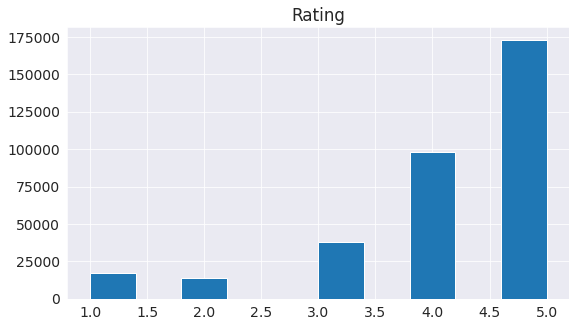

In [ ]:
df.hist(column='Rating')

**Step 7** - Get the distribution of restaurant reviews across different location.

In [ ]:
#Distribution across locations
df_ori["Location"].value_counts()

KL               98750
Petaling Jaya    49932
Penang           44502
JB               35238
Ipoh             30796
Kuching          29603
Langkawi         29303
Melaka           26690
Shah Alam         8658
Miri              8312
Name: Location, dtype: int64

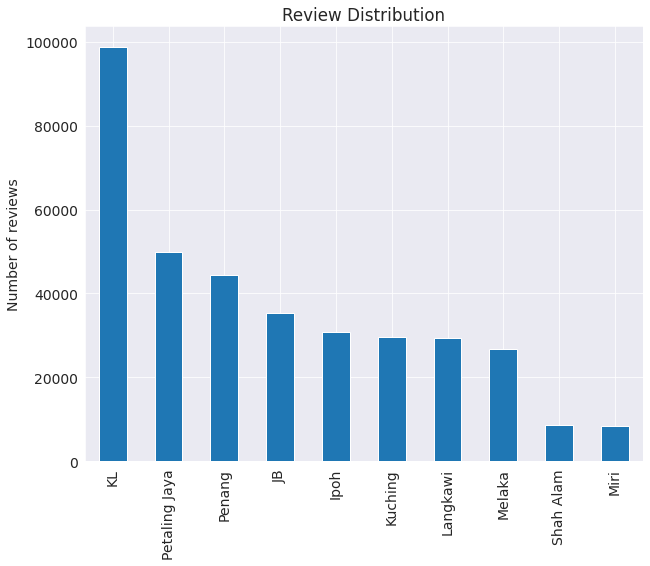

In [ ]:
df_ori["Location"].value_counts().plot(kind='bar',
                                       figsize=(10, 8),
                                       ylabel="Number of reviews",
                                       title="Review Distribution",
                                      );

**Step 7** - Explore the rating distribution of all restaurants in Malaysia.

In [ ]:
# Rating Distribution
df_ori["Location"].value_counts()

KL               98750
Petaling Jaya    49932
Penang           44502
JB               35238
Ipoh             30796
Kuching          29603
Langkawi         29303
Melaka           26690
Shah Alam         8658
Miri              8312
Name: Location, dtype: int64

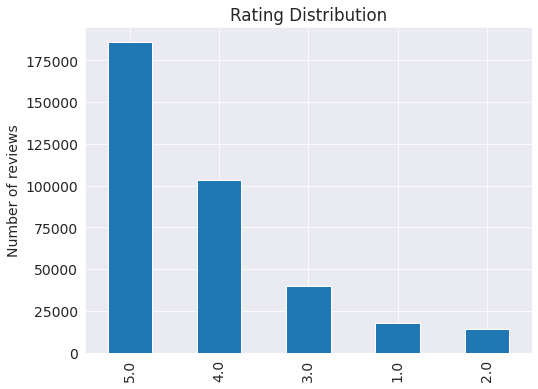

In [ ]:
# Rating Distribution Graph
df_ori["Rating"].value_counts().plot(kind='bar',
                                     figsize=(8, 6),
                                     ylabel="Number of reviews",
                                    title="Rating Distribution");

**Step 8** - Get the average rating of reviews.

In [ ]:
# Average Rating
avgRating = df_ori["Rating"].mean().round(2)
print(f"Average Rating: {avgRating}")

Average Rating: 4.18


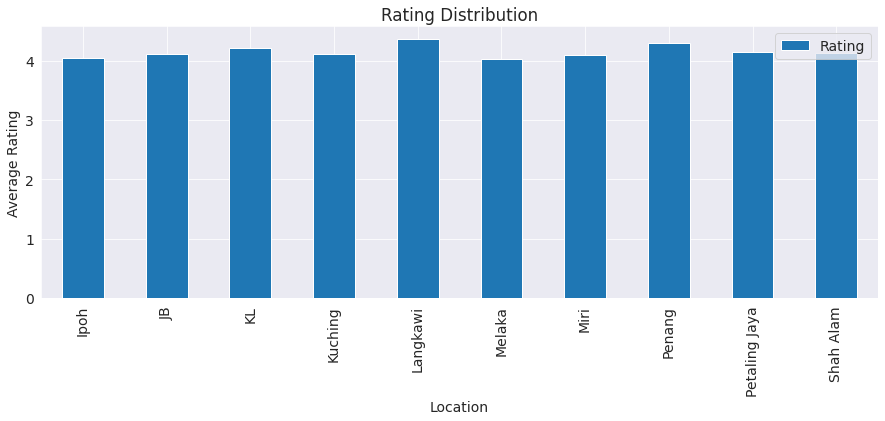

In [ ]:
# Average rating across different locations

df_ori.pivot_table(index='Location', values='Rating', aggfunc='mean') \
    .plot(kind='bar', ylabel="Average Rating",
          title="Rating Distribution", figsize=(15, 5),
         );

**Step 9** - Get the review summary uing the "Label" column in a form of barchart.

In [ ]:
df_ori["Label"].value_counts()

Positive    289745
Neutral      39835
Negative     32204
Name: Label, dtype: int64

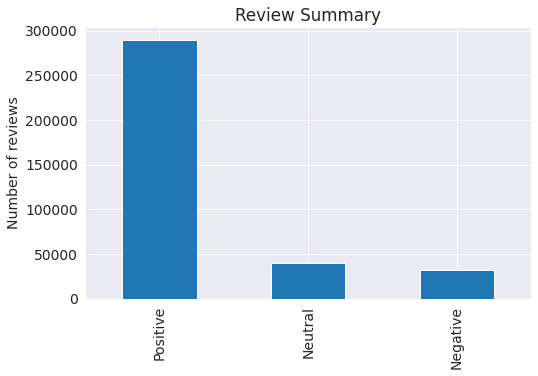

In [ ]:
df_ori["Label"].value_counts().plot(kind='bar',
                                     figsize=(8, 5),
                                     ylabel="Number of reviews",
                                    title="Review Summary");

**Step 10** - Find the percentage review type using the review summary data.

In [ ]:
# Review Type
pd.DataFrame(df_ori["Label"].value_counts())

,Label
Positive,289745
Neutral,39835
Negative,32204


In [ ]:
# Percentage of Review Type
pd.DataFrame(df_ori["Label"].value_counts() / df_ori.index.size * 100) \
    .rename(columns={'Label': "Percentage"})

,Percentage
Positive,80.087842
Neutral,11.010714
Negative,8.901444


## Asking and Answering Questions



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

What is the top 10 restaurants based on average rating

In [ ]:
averageRating_restaurants = df_ori[["Restaurant", "Rating"]] \
                .pivot_table(index=['Restaurant'], values='Rating', aggfunc='mean') \
                .sort_values('Rating', ascending=False)
averageRating_restaurants.head(10)

,Rating
Restaurant,
Spiced Pumpkin Cafe,5.0
Baan Carabao,5.0
Latte Be Light,5.0
Ayam Penyet,5.0
Restaurant Pin Wei Seafood,5.0
Restaurant Smk Corner,5.0
Restaurant Soon Tong,5.0
Thirty8 Fashion,5.0
Canard eat & roll,5.0


#### Q2: TODO - ask a question here and answer it below

Does a longer review results in better ratings?

In [ ]:
import nltk

tokenizer = nltk.RegexpTokenizer(r"\w+")

df_ori['Word_count'] = df_ori['Review'].apply(lambda x: len(tokenizer.tokenize(x)))

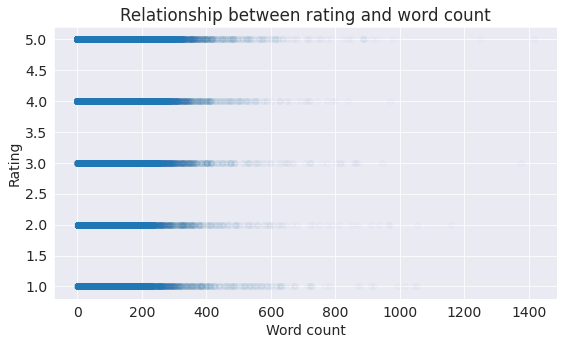

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=df_ori['Word_count'], y=df_ori['Rating'], alpha=0.02)
plt.xlabel('Word count')
plt.ylabel('Rating')
plt.title('Relationship between rating and word count');

In [ ]:
df_ori[['Word_count', 'Rating']].corr()

,Word_count,Rating
Word_count,1.000000,-0.111255
Rating,-0.111255,1.000000


From our findings, there seems to be no correlation bbetween the two variables.

#### Q3: TODO - ask a question here and answer it below

What is the most common phrase/word used by users in the reviews

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
df_positive = df[df["Rating"] > 3]
df_neutral = df[df["Rating"] == 3]
df_negative = df[df["Rating"] < 3]

In [ ]:
nltk.download('stopwords')
stopwordz = set(stopwords.words("english"))
stopwordz.remove('not') # remove negative

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
texts = " ".join(review.lower() for review in df["Review"])
# remove punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(texts)
# remove stopwords
tokens = [token for token in tokens if token not in stopwordz]

overall_unigram = nltk.FreqDist(tokens).most_common(20)

In [ ]:
overall_unigram
overallUnigram_df = pd.DataFrame(overall_unigram, columns=['Unigram', 'Count'])
overallUnigram_df

,Unigram,Count
0,food,208145
1,good,145511
2,not,87382
3,service,83760
4,place,82728
5,great,71729
6,nice,67433
7,restaurant,64852
8,staff,46725
9,delicious,41794


#### Q4: TODO - ask a question here and answer it below

What word is often used in positive reviews

In [ ]:
texts_positive = " ".join(review.lower() for review in df_positive["Review"])
# remove punctuation
tokenizer_positive = nltk.RegexpTokenizer(r"\w+")
tokens_positive = tokenizer.tokenize(texts_positive)
# remove stopwords
tokens_positive = [token for token in tokens_positive if token not in stopwordz]

positive_unigram = nltk.FreqDist(tokens_positive).most_common(20)

Text(0, 0.5, 'Unigram')

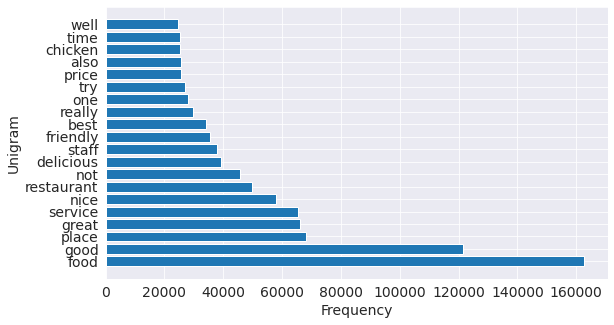

In [ ]:
positiveUnigram_df = pd.DataFrame(positive_unigram, columns=['Unigram', 'Count'])
plt.barh(positiveUnigram_df['Unigram'], width=positiveUnigram_df["Count"])
plt.xlabel('Frequency')
plt.ylabel('Unigram')

#### Q5: TODO - ask a question here and answer it below

What word is often used in negative reviews?

In [ ]:
texts_negative = " ".join(review.lower() for review in df_negative["Review"])
# remove punctuation
tokenizer_negative = nltk.RegexpTokenizer(r"\w+")
tokens_negative = tokenizer.tokenize(texts_negative)

# remove stopwords
tokens_negative = [token for token in tokens_negative if token not in stopwordz]

negative_unigram = nltk.FreqDist(tokens_negative).most_common(20)

Text(0, 0.5, 'Unigram')

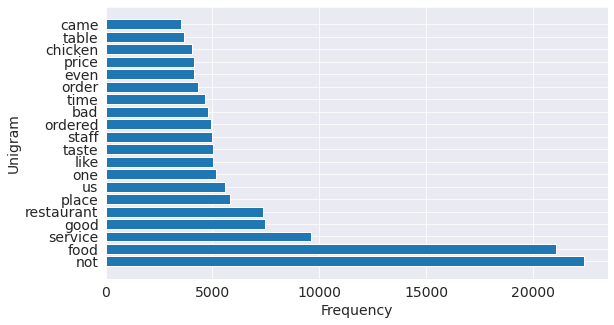

In [ ]:
negativeUnigram_df = pd.DataFrame(negative_unigram, columns=['Unigram', 'Count'])
plt.barh(negativeUnigram_df['Unigram'], width=negativeUnigram_df["Count"])
plt.xlabel('Frequency')
plt.ylabel('Unigram')

## Inferences and Conclusion


After further analysis, we have found multiple observations from our findings. Although, not all of our initial assumptions resulted in any useful outcomes such as correlation between review rating and word length. However, we did found some interesting results from observing what words were often used in both positive and negative reviews. 

## References and Future Work



In my opinion, our findings barely scratch the surface of the topic. Indeed, we could perhaps find out the reason of the problems for all the negative reviews by doing a thorough analysis unlike what we did just by using datas from review and not actually finding the cause. Hopefully, this would help the business owners to improve so they could grow their restaurants.